# Uploading data and importing important liabraries

In [1]:
#Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#create file path using file id
file_id = 'https://drive.google.com/file/d/1d9YjoxKUL6KhxUXMJwXw2nscAke5aOAT/view?usp=drive_link'
file_path_train = f'/content/drive/My Drive/{file_id}'


In [3]:
file_id = 'https://drive.google.com/file/d/1iQGGw451lK_WFcPG8tDIJT-_9ypQEHU2/view?usp=drive_link'
file_path_test = f'/content/drive/My Drive/{file_id}'

In [4]:
#Defining file paths
file_path_train = '/content/drive/My Drive/fraudTrain.csv'
file_path_test = '/content/drive/My Drive/fraudTest.csv'

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [6]:
# Import and suppress warnings to keep the output clean and focus on more important messages.
import warnings
warnings.filterwarnings('ignore')

In [7]:
from IPython.display import clear_output

# Clean the Data

In [8]:
#defining the train dataset and checking the no. of rows and columns
fraud_train=pd.read_csv(file_path_train)
fraud_train.shape

(1296675, 23)

In [9]:
#overviewing a sample of the fraud train dataset
pd.options.display.max_columns=23
fraud_train.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [10]:
#Overviewing the test dataset and checking the no. of rows and columns
fraud_test=pd.read_csv(file_path_test)
fraud_test.shape

(555719, 23)

In [11]:
#reading fraud test dataset
pd.options.display.max_columns=23
fraud_test.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0


# Note :
* **Since the file is already split between train and test, we will learn from the given train data and validate our learnings from the test data**
* **Concatenate the train and test datasets for data cleaning and data preperations (EDA)**
  * The concatenated dataset will have a label 'ind' indicating a record belong to which data set = train or test
  * Once the dataset is ready for modelling, we will split the dataset back to train and test based on the above label

In [12]:
#total no of rows after combining both data sets
fraud_test['cc_num'].count() + fraud_train['cc_num'].count()

1852394

In [13]:
#Concatnating the train and test datasets, and including a new column 'ind' that will indicate if a row belongs to test dataset or train dataset, this will
# be used later in splitting the dataset
fraud_test['ind'] = 'Test'
fraud_train['ind'] = 'Train'
fraud_combine = pd.concat([fraud_train, fraud_test], ignore_index=True)
print(fraud_combine.shape)

(1852394, 24)


In [14]:
#checking null values
fraud_combine[fraud_combine.isnull().all(axis=1)]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,ind


**Inference**  
The code doesn't return any rows implying there are no null values in any of
the columns. Hence, missing value treatment is not required.

In [15]:
#checking for duplicate records
fraud_combine.duplicated().sum()


0

**Inference**
The code returns the value 0 implying that the data does not have any duplicate values.

In [16]:
#unique value counts
unique_values_count = fraud_combine.apply(lambda x: (x.nunique(), x.dtype))
pd.set_option('display.max_columns', 25)
unique_values_count

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,ind
0,1296675,1819551,999,693,14,60616,355,486,2,999,906,51,985,983,983,891,497,984,1852394,1819583,1754157,1809753,2,2
1,int64,object,int64,object,object,float64,object,object,object,object,object,object,int64,float64,float64,int64,object,object,object,int64,float64,float64,int64,object


**Inference**

**Below columns can be dropped**

* **unnamed** is unique for all rows and can be dropped
* We have transactions for 999 credit cards and all cards belong to different card members as every card has unique address, because values in cc_num and street are same. street columns represents the first line of card members' address
* **first and last name** columns can be dropped as it is directly related to card number and it is easier to find data using card number
* **street, city, zip, lat,city_pop and long**  all are related to CM's address so we can keep city and drop the rest.
* **trans_num** is unique for all rows and can be dropped
* **merch_lat, merch_long** is unique for most of the rows and can be dropped

In [17]:
#droopping the abovementioned columns
fraud_combine=fraud_combine.drop(columns=['Unnamed: 0','trans_num','lat','long', 'merch_lat',
                                          'merch_long','zip','city_pop','street','first','last'])

**Columns to be converted to category datatype**

* **cc_num** represents credit card number and needs to be converted into a category datatype from integer
* **category** has the type of spend, we need to convert that into category datatype and change the name of the column
* **merchant, gender, state, city and job** can be converted into category datatype from object datatype

In [18]:
#converting categorical data to category datatype
fraud_combine['cc_num'] = fraud_combine['cc_num'].astype('category')
fraud_combine['city'] = fraud_combine['city'].astype('category')
fraud_combine['state'] = fraud_combine['state'].astype('category')
fraud_combine['gender'] = fraud_combine['gender'].astype('category')
fraud_combine['job'] = fraud_combine['job'].astype('category')
fraud_combine['merchant'] = fraud_combine['merchant'].astype('category')

In [19]:
# Convert the name of column 'category' to 'spend_type' and change datatype to category
fraud_combine.rename(columns={'category': 'spend_type'}, inplace=True)
fraud_combine['spend_type'] = fraud_combine['spend_type'].astype('category')

# Feature Extraction ( Arriving at New Features )
* Extract features from trans_date_trans_time
* Extract features from unix_time
* Extract features from dob

In [20]:
# convert the 'trans_date_trans_time' and 'dob' column to datetime format
fraud_combine['trans_date_trans_time'] = pd.to_datetime(fraud_combine['trans_date_trans_time'])
fraud_combine['dob'] = pd.to_datetime(fraud_combine['dob'])

**Features to be extracted from trans_date_trans_time column:**
* Year
* Month
* Day of the week
* Hour

In [21]:
# Extract year from 'trans_date_trans_time' column and create a new column 'year'
fraud_combine['year'] = fraud_combine['trans_date_trans_time'].dt.year

# Extract month from 'trans_date_trans_time' column and create a column 'month'
fraud_combine['month'] = fraud_combine['trans_date_trans_time'].dt.month

# Extract day of the week from 'trans_date_trans_time' column and create a new column 'day_of_week'
fraud_combine['day_of_week'] = fraud_combine['trans_date_trans_time'].dt.day_name()

# Extract hour from 'trans_date_trans_time' column and create a new column 'hour'
fraud_combine['hour'] = fraud_combine['trans_date_trans_time'].dt.hour

**Extract age from column 'dob' and create a new column 'age'**

In [22]:
# Calculate age based on current date

from datetime import datetime
current_date = datetime.now()
fraud_combine['age'] = ((current_date - fraud_combine['dob']).dt.days / 365.25).astype(int)

**Features from unix_time**

**Note:** unix time is the date and time representation widely used in computing. It measures time by the number of seconds that have elapsed since 00:00:00 UTC on 1 January 1970, the beginning of the Unix (Unix OS) epoch.

* We can use it to calculate the time delay between the previous and current transaction

In [23]:
# lets look at the summary of the credit card transactions

fraud_combine.groupby(['cc_num'])['cc_num'].count().sort_values(ascending = False).describe().astype(int)

count     999
mean     1854
std      1175
min         6
25%       740
50%      1471
75%      2917
max      4392
Name: cc_num, dtype: int64

* There are 999 credit cards.
* Each credit card has been utilised mutiple times (average of 1854 times)
* min - 6 times , max - 4392 times
* Hence it is important to understand the delay between the previous transaction and the current transaction for a credit card in each record

In [24]:
# sort the dataframe on transaction cc_num and unix time

fraud_combine.sort_values(by = ['cc_num','unix_time'], ascending = True, inplace = True)

In [25]:
# unix_time for the previous transaction using the shift method in pandas
fraud_combine['unix_time_prev_trans'] = fraud_combine.groupby(by = ['cc_num'])['unix_time'].shift(1)

**Null Value Treament**

In [26]:
# For the first transactions-records all the credit cards, the previouse unit time will be null
# we dont want any null values to be present in the variable as we are going to feed the dataset into machine learning models where null values are not expected
# for all the rows with null values, we are filling with the current unit time value - 86400 (number of seconds in a day)

fraud_combine['unix_time_prev_trans'].fillna(fraud_combine['unix_time'] - 86400, inplace = True)

In [27]:
# calculating the time delay between the previous and current transaction - converting the variable into mins

fraud_combine['time_lapse'] = (fraud_combine['unix_time'] - fraud_combine['unix_time_prev_trans'])//60

Dropping redundant Features:
* trans_date_trans_time
* dob
* unix_time
* unix_time_prev_trans

In [28]:
#drop column trans_date_trans_time and dob as these are not useful anymore
fraud_combine=fraud_combine.drop(columns=['trans_date_trans_time','dob','unix_time','unix_time_prev_trans'])

**Colmun 'amt' represents the amount of each transaction and has 60616 values as the transactions are in float datatype and therefore contains decimal values.**

**We will round off the values in the amount column and convert it into integer datatype to reduce cardinality**

In [29]:
#rounding float data in the 'amt' column to it's closest integer
fraud_combine[fraud_combine.select_dtypes(include='float').columns] = fraud_combine.select_dtypes(include='float').round().astype('int')
len(fraud_combine['amt'].unique())

2795

**Inference**
* We can see that the unique values in 'amt' column reduced from 60616 to only 2795



In [30]:
#checking the cleaned dataset
print(type(fraud_combine))
print(fraud_combine.shape)

<class 'pandas.core.frame.DataFrame'>
(1852394, 16)


In [31]:
fraud_combine.head(2)

,cc_num,merchant,spend_type,amt,gender,city,state,job,is_fraud,ind,year,month,day_of_week,hour,age,time_lapse
1017,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,7,F,Fort Washakie,WY,Information systems manager,0,Train,2019,1,Tuesday,12,38,1440
2724,60416207185,fraud_Berge LLC,gas_transport,53,F,Fort Washakie,WY,Information systems manager,0,Train,2019,1,Wednesday,8,38,1197


# Exploratory Data Analysis (EDA)

In [32]:
#checking unique values in fraud_combine dataset
unique_values_count = fraud_combine.apply(lambda x: (x.nunique(), x.dtype))
print(unique_values_count)

     cc_num  merchant spend_type    amt    gender      city     state  \
0       999       693         14   2795         2       906        51   
1  category  category   category  int64  category  category  category   

        job is_fraud     ind   year  month day_of_week   hour    age  \
0       497        2       2      2     12           7     24     80   
1  category    int64  object  int32  int32      object  int32  int64   

  time_lapse  
0       8323  
1      int64  


## Analysing the target column 'is_fraud'

In [33]:
# Calculate count of fraudulent transactions
fraud_count = fraud_combine['is_fraud'].sum()

# Calculate total number of transactions
total_transactions = len(fraud_combine)

# Calculate percentage of fraudulent transactions
fraud_percentage = (fraud_count / total_transactions) * 100

# Print the results
print("Total transations:", total_transactions)
print("Count of fraudulent transactions:", fraud_count)
print("Percentage of fraudulent transactions: {:.2f}%".format(fraud_percentage))

Total transations: 1852394
Count of fraudulent transactions: 9651
Percentage of fraudulent transactions: 0.52%


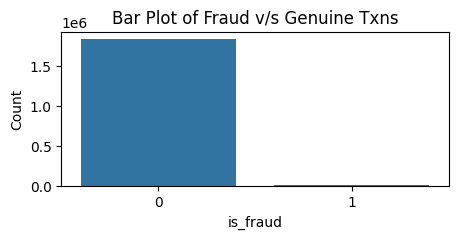

In [34]:
# Bar plot of the 'is_fraud' column

import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(5,2))
sns.countplot(x=fraud_combine['is_fraud'])
plt.title('Bar Plot of Fraud v/s Genuine Txns')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.show()

**Inference**

*Data is imbalanced*

* The dataset is Severely imbalanced, hence there is a class imbalance problem
* The majority class, the non-fraud class contributes about 99.48%
* The minority class, in this case the positive class fraud contributes only 0.52%

*What can we do?*
* we should involve nesecceary proceses to mitigate the class imbalance problem like SMOTE
* Choose the right metric for evaluating the model
* In the given context, any random model can predict the classes with 99% accuracy, hence accuracy is not the right metric to evaluate the model, we should go for the roc_auc instead , which is the measure of True Postive and True Negative.

# Analysing the amounts of transactions




In [35]:
#Descriptive analysis of amount of transactions

# Filter fraud transactions
fraud_transactions = fraud_combine[fraud_combine['is_fraud'] == 1]

# Filter not fraud transactions
not_fraud_transactions = fraud_combine[fraud_combine['is_fraud'] == 0]

# Apply describe function for fraud transactions
print("Description for Fraud Transactions:")
print(fraud_transactions['amt'].describe().round())

# Apply describe function for not fraud transactions
print("\nDescription for Not Fraud Transactions:")
print(not_fraud_transactions['amt'].describe().round())

# Calculate mode for fraud transactions and round the output
print("Mode for Fraud Transactions:")
print(fraud_transactions['amt'].mode().round())

# Calculate mode for not fraud transactions and round the output
print("\nMode for Not Fraud Transactions:")
print(not_fraud_transactions['amt'].mode().round())


Description for Fraud Transactions:
count    9651.0
mean      531.0
std       391.0
min         1.0
25%       240.0
50%       390.0
75%       902.0
max      1376.0
Name: amt, dtype: float64

Description for Not Fraud Transactions:
count    1842743.0
mean          68.0
std          154.0
min            1.0
25%           10.0
50%           47.0
75%           83.0
max        28949.0
Name: amt, dtype: float64
Mode for Fraud Transactions:
0    9
Name: amt, dtype: int64

Mode for Not Fraud Transactions:
0    2
Name: amt, dtype: int64


**Inference**

* The count of fraud transactions is very less; however, the mean, standard deviation and the quartiles are higher than that of genuine transactions.

**Let's further check the impact of this:**

In [36]:
# Calculate total amount of all transactions
amount_of_total_transactions = fraud_combine['amt'].sum()
print("Amount of all transactions:", amount_of_total_transactions)

# Calculate the total amount of fraud transactions
total_amount_of_fraud = fraud_transactions['amt'].mean()*fraud_transactions['amt'].count()
print("Total amount of fraud transactions:", total_amount_of_fraud)

# Calculate the total amount of genuine transactions
total_amount_of_genuine_transactions = not_fraud_transactions['amt'].mean()*not_fraud_transactions['amt'].count()
#print("Total amount of genuine transactions:", total_amount_of_genuine_transactions)

# Calculate the percentage of the amount of fraud transactions
percentage_of_amount_of_fraud_transactions = total_amount_of_fraud/amount_of_total_transactions*100
print("Percentage of amount of fraud transactions:", percentage_of_amount_of_fraud_transactions)

Amount of all transactions: 129783798
Total amount of fraud transactions: 5121413.0
Percentage of amount of fraud transactions: 3.946111208735007


**Inference**

We see that while the number of fraud transactions is a mere 0.52% the amount of fraud transactions is a staggering 3.95%

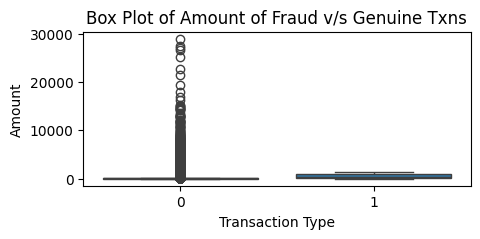

In [37]:
# Box plot for detecting outliers in amount comparing fraud and no fraud transactions
plt.figure(figsize=(5,2))
sns.boxplot(x='is_fraud', y='amt', data=fraud_combine)
plt.title('Box Plot of Amount of Fraud v/s Genuine Txns')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.show()

**Inference**

* While the range of no-fraud transactions is highly wide and has numerous outliers, fraud transactions lies within a limited range with no-outliers.
* We would have to treat the outliers in the amount categories.

# Comparing transactions Month-wise

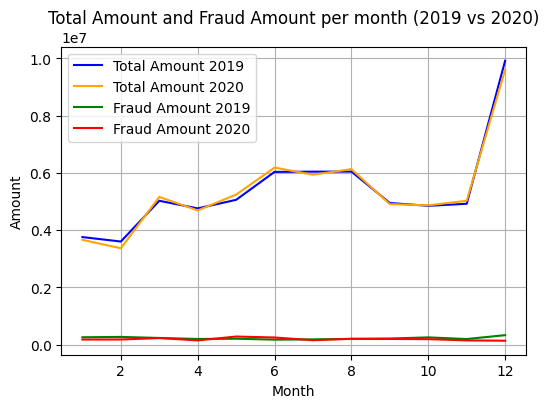

In [38]:
import matplotlib.pyplot as plt

# Step 1: Filter the dataset for the years 2019 and 2020
transactions_2019 = fraud_combine[fraud_combine['year'] == 2019]
transactions_2020 = fraud_combine[fraud_combine['year'] == 2020]

# Step 2: Group by month and sum the amounts for each year
total_amounts_2019 = transactions_2019.groupby('month')['amt'].sum().reset_index(name='total_amount_2019')
total_amounts_2020 = transactions_2020.groupby('month')['amt'].sum().reset_index(name='total_amount_2020')

# Step 3: Filter fraud transactions and group by month, summing the amounts for each year
fraud_transactions_2019 = transactions_2019[transactions_2019['is_fraud'] == 1]
fraud_transactions_2020 = transactions_2020[transactions_2020['is_fraud'] == 1]

fraud_amounts_2019 = fraud_transactions_2019.groupby('month')['amt'].sum().reset_index(name='fraud_amount_2019')
fraud_amounts_2020 = fraud_transactions_2020.groupby('month')['amt'].sum().reset_index(name='fraud_amount_2020')

# Step 4: Plot the data
plt.figure(figsize=(6, 4))

# Total amount spent every month
plt.plot(total_amounts_2019['month'], total_amounts_2019['total_amount_2019'], color='blue', label='Total Amount 2019')
plt.plot(total_amounts_2020['month'], total_amounts_2020['total_amount_2020'], color='orange', label='Total Amount 2020')

# Amount of fraud transactions every month
plt.plot(fraud_amounts_2019['month'], fraud_amounts_2019['fraud_amount_2019'], color='green', label='Fraud Amount 2019')
plt.plot(fraud_amounts_2020['month'], fraud_amounts_2020['fraud_amount_2020'], color='red', label='Fraud Amount 2020')

plt.title('Total Amount and Fraud Amount per month (2019 vs 2020)')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()


**Inference**

There is seasonality in the spend of both years.

## Checking transactions and Percentage of fraud transactions every month

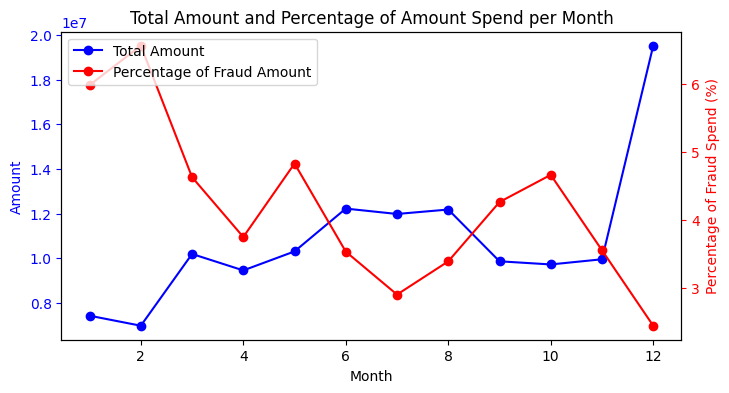

In [39]:
import matplotlib.pyplot as plt

# Group by month and calculate total transactions and fraud transactions
monthly_total_transactions = fraud_combine.groupby('month')['amt'].sum()
monthly_fraud_transactions = fraud_combine[fraud_combine['is_fraud'] == 1].groupby('month')['amt'].sum()

# Calculate percentage of fraud transactions
percentage_fraud_transactions = (monthly_fraud_transactions / monthly_total_transactions) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot total transactions every month
ax1.plot(monthly_total_transactions.index, monthly_total_transactions.values, marker='o', color='b', label='Total Amount')
ax1.set_xlabel('Month')
ax1.set_ylabel('Amount', color='b')
ax1.tick_params('y', colors='b')

# Create a secondary y-axis for percentage of fraud transactions
ax2 = ax1.twinx()
ax2.plot(percentage_fraud_transactions.index, percentage_fraud_transactions.values, marker='o', color='r', label='Percentage of Fraud Amount')
ax2.set_ylabel('Percentage of Fraud Spend (%)', color='r')
ax2.tick_params('y', colors='r')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Title
plt.title('Total Amount and Percentage of Amount Spend per Month')

plt.show()


**Inference**

The months with higher spend has lower percentages of fraud transactions.

# Comparing Transactions Hour-wise

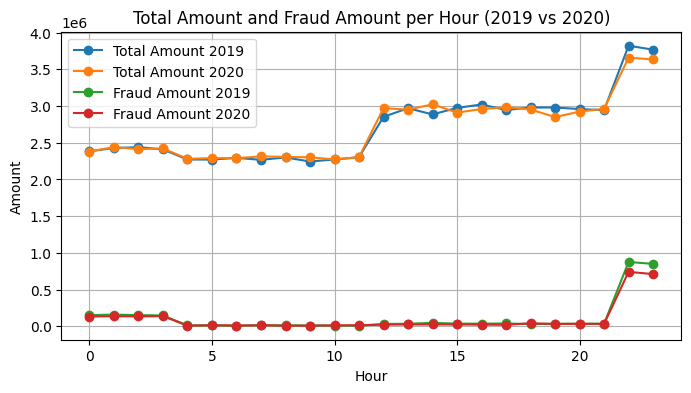

In [40]:
# Step 1: Filter the dataset for the years 2019 and 2020
transactions_2019 = fraud_combine[fraud_combine['year'] == 2019]
transactions_2020 = fraud_combine[fraud_combine['year'] == 2020]

# Step 2: Group by hour and sum the amounts for each year
total_amounts_2019 = transactions_2019.groupby('hour')['amt'].sum().reset_index(name='total_amount_2019')
total_amounts_2020 = transactions_2020.groupby('hour')['amt'].sum().reset_index(name='total_amount_2020')

# Step 3: Filter fraud transactions and group by hour, summing the amounts for each year
fraud_transactions_2019 = transactions_2019[transactions_2019['is_fraud'] == 1]
fraud_transactions_2020 = transactions_2020[transactions_2020['is_fraud'] == 1]

fraud_amounts_2019 = fraud_transactions_2019.groupby('hour')['amt'].sum().reset_index(name='fraud_amount_2019')
fraud_amounts_2020 = fraud_transactions_2020.groupby('hour')['amt'].sum().reset_index(name='fraud_amount_2020')

# Step 4: Plot the data
plt.figure(figsize=(8,4))

# Total amount spent every hour
plt.plot(total_amounts_2019['hour'], total_amounts_2019['total_amount_2019'], label='Total Amount 2019',marker='o')
plt.plot(total_amounts_2020['hour'], total_amounts_2020['total_amount_2020'], label='Total Amount 2020',marker='o')

# Amount of fraud transactions every hour
plt.plot(fraud_amounts_2019['hour'], fraud_amounts_2019['fraud_amount_2019'], label='Fraud Amount 2019',marker='o')
plt.plot(fraud_amounts_2020['hour'], fraud_amounts_2020['fraud_amount_2020'], label='Fraud Amount 2020',marker='o')

plt.title('Total Amount and Fraud Amount per Hour (2019 vs 2020)')
plt.xlabel('Hour')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

**Inference**

* Seasonality in the spend of both years
* Maximum fraud transactions occured from 10:00 pm till 3:00 am
* Maximum transactions are made from 11am till 11pm

# Checking fraud transactions on different days of the week

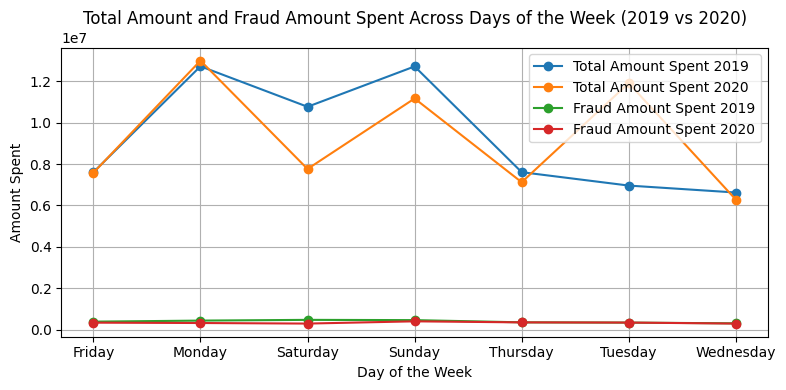

In [41]:
# Step 1: Filter the dataset for the years 2019 and 2020
data_2019 = fraud_combine[fraud_combine['year'] == 2019]
data_2020 = fraud_combine[fraud_combine['year'] == 2020]

# Step 2: Group the filtered dataset by day of the week and calculate the total amount spent and the total fraud amount spent for each day of the week in each year
total_spent_2019 = data_2019.groupby('day_of_week')['amt'].sum().reset_index(name='total_spent_2019')
fraud_spent_2019 = data_2019[data_2019['is_fraud'] == 1].groupby('day_of_week')['amt'].sum().reset_index(name='fraud_spent_2019')

total_spent_2020 = data_2020.groupby('day_of_week')['amt'].sum().reset_index(name='total_spent_2020')
fraud_spent_2020 = data_2020[data_2020['is_fraud'] == 1].groupby('day_of_week')['amt'].sum().reset_index(name='fraud_spent_2020')

# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Step 3: Plot the data using a line graph
plt.figure(figsize=(8,4))

# Plot total amount spent
plt.plot(total_spent_2019['day_of_week'], total_spent_2019['total_spent_2019'], label='Total Amount Spent 2019', marker='o')
plt.plot(total_spent_2020['day_of_week'], total_spent_2020['total_spent_2020'], label='Total Amount Spent 2020', marker='o')

# Plot fraud amount spent
plt.plot(fraud_spent_2019['day_of_week'], fraud_spent_2019['fraud_spent_2019'], label='Fraud Amount Spent 2019', marker='o')
plt.plot(fraud_spent_2020['day_of_week'], fraud_spent_2020['fraud_spent_2020'], label='Fraud Amount Spent 2020', marker='o')

# Set x-axis ticks and labels
plt.xticks(day_order)

# Add labels and title
plt.title('Total Amount and Fraud Amount Spent Across Days of the Week (2019 vs 2020)')
plt.xlabel('Day of the Week')
plt.ylabel('Amount Spent')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

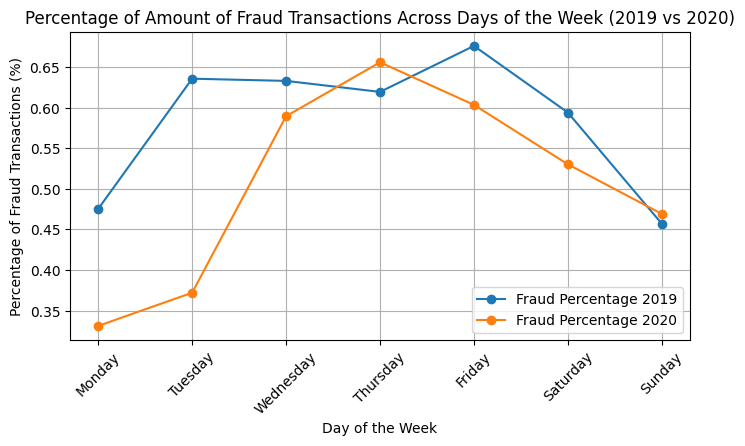

In [42]:
# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Step 1: Filter the dataset for the years 2019 and 2020
data_2019 = fraud_combine[fraud_combine['year'] == 2019]
data_2020 = fraud_combine[fraud_combine['year'] == 2020]

# Step 2: Group the filtered dataset by 'day_of_week' and calculate the total number of transactions and total number of fraud transactions for each day of the week in each year
total_transactions_2019 = data_2019.groupby('day_of_week').size().reindex(day_order, fill_value=0).reset_index(name='total_transactions_2019')
fraud_transactions_2019 = data_2019[data_2019['is_fraud'] == 1].groupby('day_of_week').size().reindex(day_order, fill_value=0).reset_index(name='fraud_transactions_2019')

total_transactions_2020 = data_2020.groupby('day_of_week').size().reindex(day_order, fill_value=0).reset_index(name='total_transactions_2020')
fraud_transactions_2020 = data_2020[data_2020['is_fraud'] == 1].groupby('day_of_week').size().reindex(day_order, fill_value=0).reset_index(name='fraud_transactions_2020')

# Step 3: Calculate the percentage of fraud transactions for each day of the week in each year
fraud_percentage_2019 = (fraud_transactions_2019['fraud_transactions_2019'] / total_transactions_2019['total_transactions_2019']) * 100
fraud_percentage_2020 = (fraud_transactions_2020['fraud_transactions_2020'] / total_transactions_2020['total_transactions_2020']) * 100

# Step 4: Plot the data using a line graph
plt.figure(figsize=(8,4))

plt.plot(total_transactions_2019['day_of_week'], fraud_percentage_2019, label='Fraud Percentage 2019', marker='o')
plt.plot(total_transactions_2020['day_of_week'], fraud_percentage_2020, label='Fraud Percentage 2020', marker='o')

plt.title('Percentage of Amount of Fraud Transactions Across Days of the Week (2019 vs 2020)')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage of Fraud Transactions (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

**Inference**

* The total spend on different days of the week is not seasonal but the fraud spend is seasonal

# Checking the time lapse between fraud and no-fraud transactions

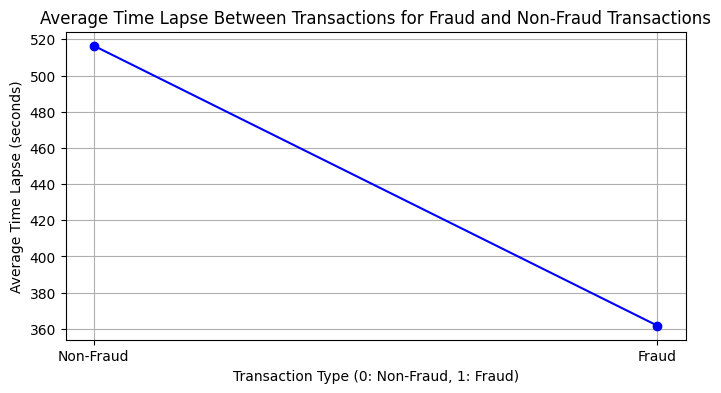

In [43]:
# Step 1: Group the dataset by the 'is_fraud' column to separate fraud and non-fraud transactions
grouped_data = fraud_combine.groupby('is_fraud')

# Step 2: Calculate the average time lapse for fraud and non-fraud transactions
average_time_lapse = grouped_data['time_lapse'].mean()

# Step 3: Plot the average time lapse for fraud and non-fraud transactions using a line plot
plt.figure(figsize=(8,4))

# Plot the line plot
average_time_lapse.plot(marker='o', color='b', linestyle='-')

# Add labels and title
plt.title('Average Time Lapse Between Transactions for Fraud and Non-Fraud Transactions')
plt.xlabel('Transaction Type (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Average Time Lapse (seconds)')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.grid(True)
plt.show()

**Inference**

* The time difference between fraud transactions is lesser than genuine transactions

## Analysing total and percentage of fraud transactions for different age groups

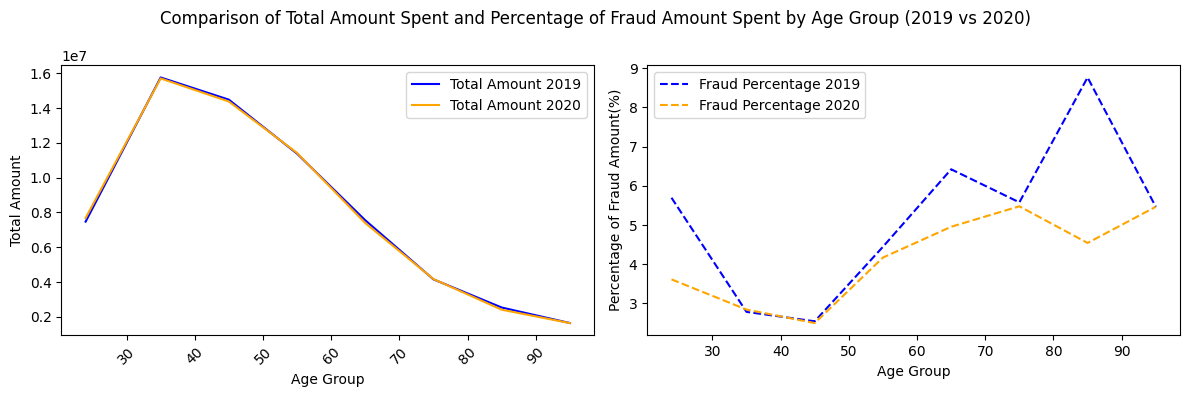

In [44]:
# Step 1: Divide the dataset into two separate dataframes based on years 2019 and 2020
data_2019 = fraud_combine[fraud_combine['year'] == 2019]
data_2020 = fraud_combine[fraud_combine['year'] == 2020]

# Step 2: Define bins for age groups
bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]

# Step 3: Group the data by age bins and sum the amounts for each year
data_2019['age_group'] = pd.cut(data_2019['age'], bins)
data_2020['age_group'] = pd.cut(data_2020['age'], bins)

total_amount_2019 = data_2019.groupby('age_group')['amt'].sum().reset_index(name='total_amount_2019')
total_amount_2020 = data_2020.groupby('age_group')['amt'].sum().reset_index(name='total_amount_2020')

total_amount_2019['age_group_mid'] = total_amount_2019['age_group'].apply(lambda x: x.mid)
total_amount_2020['age_group_mid'] = total_amount_2020['age_group'].apply(lambda x: x.mid)

# Step 4: Filter the data for fraud transactions, group by age bins, and sum the amounts for each year
fraud_transactions_2019 = data_2019[data_2019['is_fraud'] == 1]
fraud_transactions_2020 = data_2020[data_2020['is_fraud'] == 1]

fraud_amount_2019 = fraud_transactions_2019.groupby('age_group')['amt'].sum().reset_index(name='fraud_amount_2019')
fraud_amount_2020 = fraud_transactions_2020.groupby('age_group')['amt'].sum().reset_index(name='fraud_amount_2020')

# Step 5: Calculate the percentage of fraud transactions for each age group
total_amount_2019['fraud_percentage_2019'] = (fraud_amount_2019['fraud_amount_2019'] / total_amount_2019['total_amount_2019']) * 100
total_amount_2020['fraud_percentage_2020'] = (fraud_amount_2020['fraud_amount_2020'] / total_amount_2020['total_amount_2020']) * 100

# Step 6: Create subplots and plot the data
fig, axs = plt.subplots(1, 2, figsize=(12,4))

# Total amount spent by different age groups for year 2019 and 2020
axs[0].plot(total_amount_2019['age_group_mid'], total_amount_2019['total_amount_2019'], label='Total Amount 2019', color='blue')
axs[0].plot(total_amount_2020['age_group_mid'], total_amount_2020['total_amount_2020'], label='Total Amount 2020', color='orange')
axs[0].set_xlabel('Age Group')
axs[0].set_ylabel('Total Amount')
axs[0].tick_params(axis='x', rotation=45)
axs[0].legend()

# Percentage of the amount of fraud transactions spent by different age groups for year 2019 and 2020
axs[1].plot(total_amount_2019['age_group_mid'], total_amount_2019['fraud_percentage_2019'], label='Fraud Percentage 2019', linestyle='--', color='blue')
axs[1].plot(total_amount_2020['age_group_mid'], total_amount_2020['fraud_percentage_2020'], label='Fraud Percentage 2020', linestyle='--', color='orange')
axs[1].set_xlabel('Age Group')
axs[1].set_ylabel('Percentage of Fraud Amount(%)')
axs[1].legend()

plt.suptitle('Comparison of Total Amount Spent and Percentage of Fraud Amount Spent by Age Group (2019 vs 2020)')
plt.tight_layout()
plt.show()

**Inference**

* Seasonality in the spend across different age groups is similar for both years.
* Age groups 31 to 40 and 41-50 spends the most and also has less percentage of fraud transactions.
* Age group 60-90 has higher percentage of fraud transactions that has reduced with time.

# Analysing the spend pattern and occurance of fraud across both genders

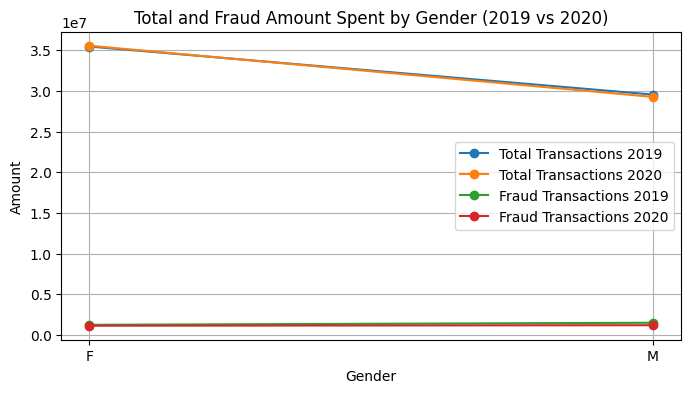

In [45]:
# Step 1: Filter the dataset for the years 2019 and 2020
data_2019 = fraud_combine[fraud_combine['year'] == 2019]
data_2020 = fraud_combine[fraud_combine['year'] == 2020]

# Step 2: Group the filtered dataset by gender and calculate total transaction amount and fraud transaction amount for each gender in each year
total_transactions_2019 = data_2019.groupby('gender')['amt'].sum().reset_index(name='total_transactions_2019')
fraud_transactions_2019 = data_2019[data_2019['is_fraud'] == 1].groupby('gender')['amt'].sum().reset_index(name='fraud_transactions_2019')

total_transactions_2020 = data_2020.groupby('gender')['amt'].sum().reset_index(name='total_transactions_2020')
fraud_transactions_2020 = data_2020[data_2020['is_fraud'] == 1].groupby('gender')['amt'].sum().reset_index(name='fraud_transactions_2020')

# Step 3: Plot the data using a line graph
plt.figure(figsize=(8, 4))

# Plot total transactions by gender
plt.plot(total_transactions_2019['gender'], total_transactions_2019['total_transactions_2019'], label='Total Transactions 2019', marker='o')
plt.plot(total_transactions_2020['gender'], total_transactions_2020['total_transactions_2020'], label='Total Transactions 2020', marker='o')

# Plot fraud transactions by gender
plt.plot(fraud_transactions_2019['gender'], fraud_transactions_2019['fraud_transactions_2019'], label='Fraud Transactions 2019', marker='o')
plt.plot(fraud_transactions_2020['gender'], fraud_transactions_2020['fraud_transactions_2020'], label='Fraud Transactions 2020', marker='o')

plt.title('Total and Fraud Amount Spent by Gender (2019 vs 2020)')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

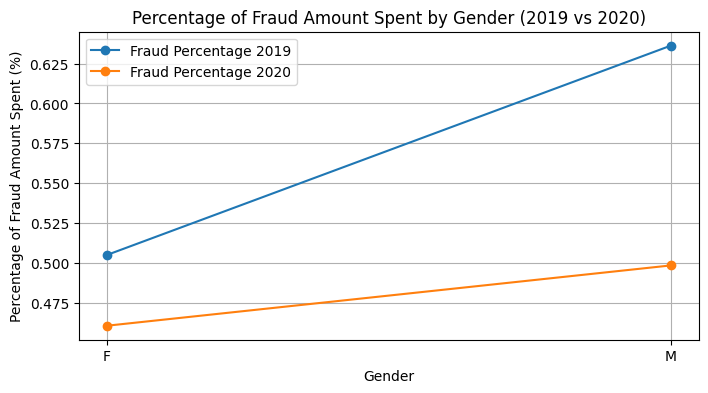

In [46]:
# Step 1: Filter the dataset for the years 2019 and 2020
data_2019 = fraud_combine[fraud_combine['year'] == 2019]
data_2020 = fraud_combine[fraud_combine['year'] == 2020]

# Step 2: Group the filtered dataset by gender and calculate the total number of transactions and total number of fraud transactions for each gender in each year
total_transactions_2019 = data_2019.groupby('gender').size().reset_index(name='total_transactions_2019')
fraud_transactions_2019 = data_2019[data_2019['is_fraud'] == 1].groupby('gender').size().reset_index(name='fraud_transactions_2019')

total_transactions_2020 = data_2020.groupby('gender').size().reset_index(name='total_transactions_2020')
fraud_transactions_2020 = data_2020[data_2020['is_fraud'] == 1].groupby('gender').size().reset_index(name='fraud_transactions_2020')

# Step 3: Calculate the percentage of fraud transactions for each gender in each year
fraud_percentage_2019 = (fraud_transactions_2019['fraud_transactions_2019'] / total_transactions_2019['total_transactions_2019']) * 100
fraud_percentage_2020 = (fraud_transactions_2020['fraud_transactions_2020'] / total_transactions_2020['total_transactions_2020']) * 100

# Step 4: Plot the data using a line graph
plt.figure(figsize=(8,4))

plt.plot(total_transactions_2019['gender'], fraud_percentage_2019, label='Fraud Percentage 2019', marker='o')
plt.plot(total_transactions_2020['gender'], fraud_percentage_2020, label='Fraud Percentage 2020', marker='o')

plt.title('Percentage of Fraud Amount Spent by Gender (2019 vs 2020)')
plt.xlabel('Gender')
plt.ylabel('Percentage of Fraud Amount Spent (%)')
plt.legend()
plt.grid(True)
plt.show()

# Inference

* Sesonality in the spend of both genders for year 2019 and 2020.
* Female Cardmembers has more total spend.
* Males Cardmembers has higher percentage of fraud spend.


## Checking the relationship between spend type and fraud transactions

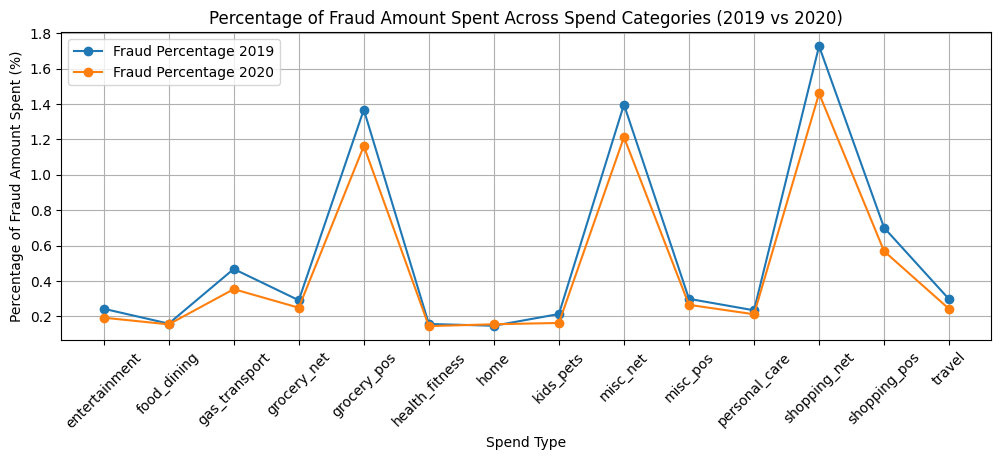

In [47]:
# Step 1: Filter the dataset for the years 2019 and 2020
data_2019 = fraud_combine[fraud_combine['year'] == 2019]
data_2020 = fraud_combine[fraud_combine['year'] == 2020]

# Step 2: Group the filtered dataset by 'spend_type' and calculate the total number of transactions and total number of fraud transactions for each spend category in each year
total_transactions_2019 = data_2019.groupby('spend_type').size().reset_index(name='total_transactions_2019')
fraud_transactions_2019 = data_2019[data_2019['is_fraud'] == 1].groupby('spend_type').size().reset_index(name='fraud_transactions_2019')

total_transactions_2020 = data_2020.groupby('spend_type').size().reset_index(name='total_transactions_2020')
fraud_transactions_2020 = data_2020[data_2020['is_fraud'] == 1].groupby('spend_type').size().reset_index(name='fraud_transactions_2020')

# Step 3: Calculate the percentage of fraud transactions for each spend category in each year
fraud_percentage_2019 = (fraud_transactions_2019['fraud_transactions_2019'] / total_transactions_2019['total_transactions_2019']) * 100
fraud_percentage_2020 = (fraud_transactions_2020['fraud_transactions_2020'] / total_transactions_2020['total_transactions_2020']) * 100

# Step 4: Plot the data using a line graph
plt.figure(figsize=(12,4))

plt.plot(total_transactions_2019['spend_type'], fraud_percentage_2019, label='Fraud Percentage 2019', marker='o')
plt.plot(total_transactions_2020['spend_type'], fraud_percentage_2020, label='Fraud Percentage 2020', marker='o')

plt.title('Percentage of Fraud Amount Spent Across Spend Categories (2019 vs 2020)')
plt.xlabel('Spend Type')
plt.ylabel('Percentage of Fraud Amount Spent (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

**Inferences:**

* Seasonality across different spend types is similar for both years.
* Maximum fraud amount spent on internet shopping, miscelleous internet shopping and point of sale grocery shopping.

##Checking the percentage of fraud transactions on credit cards sorted in descending order

In [48]:
# Filter the dataset to include only fraud transactions
fraud_transactions = fraud_combine[fraud_combine['is_fraud'] == 1]

# Calculate the count of fraud transactions for each credit card
fraud_count_per_card = fraud_transactions.groupby('cc_num').size()

# Calculate the total count of transactions for each credit card
total_count_per_card = fraud_combine.groupby('cc_num').size()

# Calculate the percentage of fraud transactions for each credit card
fraud_percentage_per_card = (fraud_count_per_card / total_count_per_card) * 100

# Sort the credit cards based on the percentage of fraud transactions in descending order
sorted_fraud_percentage = fraud_percentage_per_card.sort_values(ascending=False)

print(sorted_fraud_percentage)

cc_num
3524485462198080       100.0
2716017661090253       100.0
4748866581408          100.0
378262805520186        100.0
5301645381939419       100.0
                       ...  
3506592072985012         0.0
5359543825610251         0.0
4708992452821239         0.0
4410582919485061752      0.0
379897244598068          0.0
Length: 999, dtype: float64


**Inference**

On a few credit cards all transactions were reported as fraud, while no fraud was reported on some credit cards.

## Creating a  frequency distribution table for percentage of fraud transactions on credit cards

In [49]:
# Define the bins
bins = [0, 25, 50, 75, 100]

# Create a new DataFrame with bins for percentage of fraud transactions and count of credit cards
bins_df = pd.DataFrame(pd.cut(fraud_percentage_per_card, bins=bins, include_lowest=True).value_counts()).reset_index()

# Rename the columns
bins_df.columns = ['Percentage Bin', 'Number of Credit Cards']

print(bins_df)

   Percentage Bin  Number of Credit Cards
0  (-0.001, 25.0]                     908
1   (75.0, 100.0]                      91
2    (25.0, 50.0]                       0
3    (50.0, 75.0]                       0


In [50]:
# Filter the credit cards where all the transactions were reported fraudulent
fraudulent_cards = fraud_percentage_per_card[fraud_percentage_per_card == 100]

# Filter the credit cards where no transactions were reported fraudulent
nofraud_cards = fraud_percentage_per_card[fraud_percentage_per_card == 0]
# Filter the credit cards where upto 15% fraud transactions were reported fraudulent
upto15_cards = fraud_percentage_per_card[fraud_percentage_per_card < 15]
print("Number of cards with 100% fraud transactions:", len(fraudulent_cards))
print("Number of cards with no fraud transactions:", len(nofraud_cards))
print("Number of cards with upto 15% fraud transactions:", len(upto15_cards))

Number of cards with 100% fraud transactions: 91
Number of cards with no fraud transactions: 23
Number of cards with upto 15% fraud transactions: 908


**Inference**

* We see that the credit cards are majorly divided in four categories, 23 cards have no fraud transactions, majority of credit cards have 0.01-15 percent of fraud transactions, some have 15.01%-25% fraud transations and 91 cards have 100% fraud transactions.
* The column '**cc_num**' can be dropped as it is highly cardinal.

## Checking the merchants that have most and least fraud transactions

In [51]:
# Filter the dataset to include only fraud transactions
fraud_transactions = fraud_combine[fraud_combine['is_fraud'] == 1]

# Calculate the count of fraud transactions for each merchant
fraud_count_per_card = fraud_transactions.groupby('merchant').size()

# Calculate the total count of transactions for each merchant
total_count_per_card = fraud_combine.groupby('merchant').size()

# Calculate the percentage of fraud transactions for each merchant
fraud_percentage_per_card = (fraud_count_per_card / total_count_per_card) * 100

# Sort the credit cards based on the percentage of fraud transactions in descending order
sorted_fraud_percentage = fraud_percentage_per_card.sort_values(ascending=False)

print(sorted_fraud_percentage)

merchant
fraud_Kozey-Boehm                        2.175489
fraud_Herman, Treutel and Dickens        2.032086
fraud_Terry-Huel                         1.955307
fraud_Kerluke-Abshire                    1.897533
fraud_Mosciski, Ziemann and Farrell      1.878766
                                           ...   
fraud_McKenzie-Huels                     0.000000
fraud_Paucek-Wiza                        0.000000
fraud_Wiegand-Lowe                       0.000000
fraud_Gulgowski LLC                      0.000000
fraud_Hodkiewicz, Prohaska and Paucek    0.000000
Length: 693, dtype: float64


In [52]:
# Filter the DataFrame to get merchants with 0 fraud transactions
merchants_with_zero_fraud = fraud_percentage_per_card[fraud_percentage_per_card == 0]

print("Number of merchants with 0 fraud transactions:", (len(merchants_with_zero_fraud)))
print(merchants_with_zero_fraud)

Number of merchants with 0 fraud transactions: 8
merchant
fraud_Gulgowski LLC                      0.0
fraud_Hodkiewicz, Prohaska and Paucek    0.0
fraud_McKenzie-Huels                     0.0
fraud_Paucek-Wiza                        0.0
fraud_Reichert-Weissnat                  0.0
fraud_Ritchie, Bradtke and Stiedemann    0.0
fraud_Schroeder Group                    0.0
fraud_Wiegand-Lowe                       0.0
dtype: float64


**Inference**

* We have a total of 693 merchants with only 8 reporting no fraud transactions and all other reporting 0.01-2% fraud transaction.
* We can drop the merchant column before model building as it is highly cardinal and is not impacting fraud transactions significantly.

## Checking the jobs that have most and least fraud transactions

In [53]:

# Group by the job column and calculate the total number of transactions and fraud transactions for each job category
job_stats = fraud_combine.groupby('job')['is_fraud'].agg(['count', 'sum']).reset_index()

# Calculate the percentage of fraud transactions for each job category
job_stats['fraud_percentage'] = (job_stats['sum'] / job_stats['count']) * 100

# Select only the columns of interest (job and percentage of fraud transactions)
job_fraud_percentage = job_stats[['job', 'fraud_percentage']]

# Sort the DataFrame in descending order based on the fraud_percentage column
sorted_job_fraud_percentage = job_fraud_percentage.sort_values(by='fraud_percentage', ascending=False)

# Display the sorted DataFrame
print(sorted_job_fraud_percentage)

                          job  fraud_percentage
228                 Homeopath        100.000000
1       Accountant, chartered        100.000000
202   Forest/woodland manager        100.000000
427         Software engineer        100.000000
423               Ship broker        100.000000
..                        ...               ...
219          Health physicist          0.068587
107                Contractor          0.045809
436             Stage manager          0.000000
163        Engineer, drilling          0.000000
161  Engineer, communications          0.000000

[497 rows x 2 columns]


In [54]:
# Define the bins for the fraud percentage
bins = [0,1,2,5,10, 25, 50, 75, 100]

# Use pd.cut to bin the fraud_percentage column
job_fraud_percentage['fraud_percentage_bin'] = pd.cut(job_fraud_percentage['fraud_percentage'], bins=bins, labels=['0-1%','1.01-2%','2.01-5%','5.01-10%','10.01-25%','26-50%', '51-75%', '76-100%'])

# Group by the fraud_percentage bins and calculate summary statistics
fraud_percentage_summary = job_fraud_percentage.groupby('fraud_percentage_bin').agg({'job': 'count'}).reset_index()

# Rename the columns for clarity
fraud_percentage_summary.columns = ['fraud_percentage_bin', 'num_jobs']

# Display the resulting table
print(fraud_percentage_summary)


  fraud_percentage_bin  num_jobs
0                 0-1%       404
1              1.01-2%        58
2              2.01-5%        10
3             5.01-10%         0
4            10.01-25%         0
5               26-50%         0
6               51-75%         0
7              76-100%        22


In [55]:
# Filter the DataFrame to include only rows where fraud_percentage are 100%
jobs_with_all_fraud = job_fraud_percentage[job_fraud_percentage['fraud_percentage'] == 100]

#checking the number of jobs that reported 100% fraud transactions
print("Number of jobs reporting 100% fraud transactions:",len(jobs_with_all_fraud))

Number of jobs reporting 100% fraud transactions: 22


**Inferences**

* Majority of card members from different job categories have reported 0-1% fraud transactions.
* Some job categories reported 1.01-5% fraud transactions.
* There are card members from 22 job categories who have reported all transactions made by them as fraud; listed in **'jobs_with_all_fraud'**
* Further, jobs column can be dropped as it is highly cardinal


# Checking the cities that have most and least fraud transactions

In [56]:
# check the percentage of fraud transactions in the 'city' column and sort the results in descending order

# Group the DataFrame by the 'city' column and calculate the percentage of fraud transactions for each city
fraud_percentage_per_city = fraud_combine.groupby('city')['is_fraud'].mean() * 100

# Sort the cities based on the percentage of fraud transactions in descending order
sorted_fraud_percentage_city = fraud_percentage_per_city.sort_values(ascending=False)

# Display the sorted percentages
print(sorted_fraud_percentage_city)


city
Greenport       100.0
Orange Park     100.0
Freeport        100.0
Gaines          100.0
Beacon          100.0
                ...  
Baroda            0.0
Tomahawk          0.0
Lubbock           0.0
Pewee Valley      0.0
Clay Center       0.0
Name: is_fraud, Length: 906, dtype: float64


In [57]:
# Filter the Series to include only cities with 100 percent fraud transactions
cities_with_100_percent_fraud = fraud_percentage_per_city[fraud_percentage_per_city == 100]

# Filter the Series to include only cities with no fraud transactions
cities_with_no_percent_fraud = fraud_percentage_per_city[fraud_percentage_per_city == 0]

# Display the cities with no fraud transactions
print("Number of cities with 100% fraud transactions:", len(cities_with_100_percent_fraud))
print(cities_with_100_percent_fraud)
print("Number of cities with no fraud transaction:", len(cities_with_no_percent_fraud))
print(cities_with_no_percent_fraud)

Number of cities with 100% fraud transactions: 70
city
Angwin            100.0
Ashland           100.0
Beacon            100.0
Brookfield        100.0
Bruce             100.0
                  ...  
Wartburg          100.0
Waukau            100.0
West Frankfort    100.0
Wever             100.0
Winnsboro         100.0
Name: is_fraud, Length: 70, dtype: float64
Number of cities with no fraud transaction: 19
city
Alton            0.0
Ballwin          0.0
Baroda           0.0
Belgrade         0.0
Clay Center      0.0
Cord             0.0
Hinckley         0.0
Kirtland Afb     0.0
Lubbock          0.0
Mayersville      0.0
Milwaukee        0.0
Pewee Valley     0.0
Pittsburgh       0.0
Ratcliff         0.0
San Angelo       0.0
Tallmansville    0.0
Tomahawk         0.0
Wheaton          0.0
Woods Cross      0.0
Name: is_fraud, dtype: float64


**Inference**
* 70 cities reported 100% fraud transactions listed in **cities_with_100_percent_fraud**
* 19 cities reported no fraud transactions listed in **cities_with_no_percent_fraud**

In [58]:
# creating a frequency distribution table for percentage of fraud transactions in different cities

# Define the bins for percentage ranges
bins = [0,1,2,3,4,5,10,20, 30, 50, 75, 100]

# Bin the percentages into these ranges
fraud_bins = pd.cut(sorted_fraud_percentage_city, bins=bins, include_lowest=True)

# Group by the fraud bins and count occurrences in each bin
bin_counts = fraud_bins.value_counts().reset_index().rename(columns={'index': 'Fraud Bin', 0: 'Number of Cities'})

# Display the resulting table
print(bin_counts)

         is_fraud  count
0   (-0.001, 1.0]    674
1      (1.0, 2.0]    148
2   (75.0, 100.0]     70
3      (2.0, 3.0]     12
4      (3.0, 4.0]      2
5      (4.0, 5.0]      0
6     (5.0, 10.0]      0
7    (10.0, 20.0]      0
8    (20.0, 30.0]      0
9    (30.0, 50.0]      0
10   (50.0, 75.0]      0


**Inference**

* Majority of the cities reported 0-1% of fraud transactions.
* A few cities reported 1.01%-2% of fraud transactions.
* Very few cities reported 2%-4% of fraud transactions.
* 70 cities reported all transactions as fraudulent, listed in series **'cities_with_100_percent_fraud'**.
* 19 cities reported no fraud transactions, listed in series **'num_cities_with_no_fraud'**.

**Use the Pearson correlation coefficient to measure the strength and direction of the linear relationship between the total transactions and total fraud transactions for each city.**

In [59]:
from scipy.stats import pearsonr

# Calculate the total number of transactions for each city
total_transactions_per_city = fraud_combine['city'].value_counts()

# Calculate the total number of fraud transactions for each city
fraud_transactions_per_city = fraud_combine.groupby('city')['is_fraud'].sum()

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(total_transactions_per_city, fraud_transactions_per_city)

# Print the results
print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)


Pearson correlation coefficient: 0.06918995104295149
P-value: 0.0373217759782307


**Inference**

* Significance level of 0.05
* Null Hypothesis: There is no correlation between total transactions and fraud transactions in cities.
* Alternate Hypothesis: There is correlation between total transactions and fraud transactions.
  * A p-value less than 0.05 suggests that the observed correlation is statistically significant
  * In this case, the p-value is less than 0.05, indicating that we reject the null hypothesis.
* Therefore, we can conclude that there is a statistically significant correlation between the total number of transactions and the total number of fraud transactions in cities.
* It's important to note that while there is statistical significance, the Pearson correlation coefficient is still relatively low (0.069), indicating a weak positive correlation. However, despite the weak correlation, it is statistically significant.
* The column city can further be dropped as it is highly cardinal.

# Analysing total and fraud transactions in different states

In [60]:
# Creating a table sorted in descending order with percentage of fraud transactions in different states

# Calculate the total number of transactions (fraud and non-fraud) for each state
total_transactions_per_state = fraud_combine.groupby('state')['is_fraud'].count()

# Calculate the total number of fraud transactions for each state
fraud_transactions_per_state = fraud_combine.groupby('state')['is_fraud'].sum()

# Calculate the percentage of fraud transactions for each state
fraud_percentage_per_state = (fraud_transactions_per_state / total_transactions_per_state) * 100

# Create a DataFrame to store the percentage of fraud transactions for each state
fraud_percentage_table = pd.DataFrame({
    'Percentage of Fraud Transactions': fraud_percentage_per_state
})

# Sort the DataFrame based on the percentage of fraud transactions in descending order
sorted_fraud_percentage_table = fraud_percentage_table.sort_values(by='Percentage of Fraud Transactions', ascending=False)

# Display the sorted table
print(sorted_fraud_percentage_table)



       Percentage of Fraud Transactions
state                                  
DE                           100.000000
RI                             2.013423
AK                             1.687479
OR                             0.745986
NH                             0.673659
VA                             0.653798
TN                             0.638221
NE                             0.627451
MN                             0.616292
NY                             0.611293
DC                             0.604288
KS                             0.585932
NV                             0.583271
CO                             0.581807
ME                             0.571843
SC                             0.565527
MS                             0.562939
FL                             0.549568
IN                             0.548825
GA                             0.546331
WI                             0.546265
IA                             0.543758
MD                             0.543580


**Inference**

* Minimum 0.37% fraud transactions in every state
* States with maximum fraud transactions
  * DE                           100%
  * RI                             2.01%
  * AK                             1.69%

### Plotting the fraud transactions for every state along with total transactions for every state for comparision

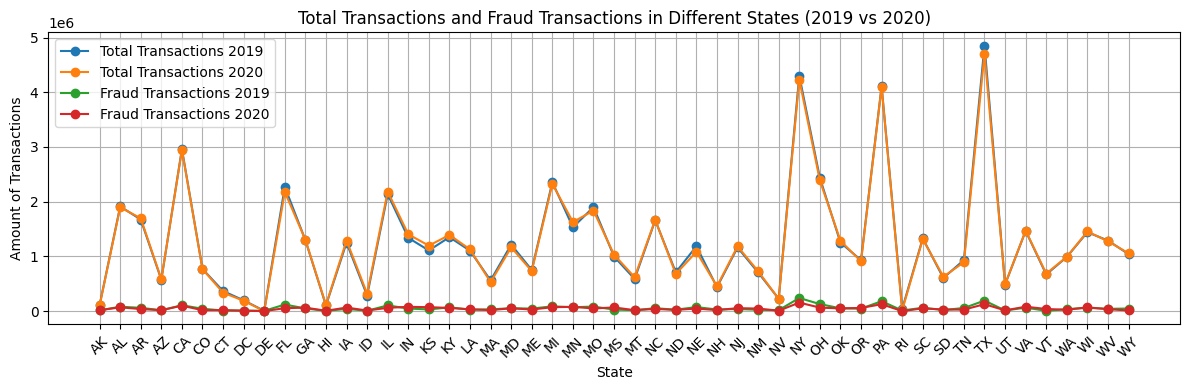

In [61]:
# Step 1: Filter the dataset for the years 2019 and 2020
data_2019 = fraud_combine[fraud_combine['year'] == 2019]
data_2020 = fraud_combine[fraud_combine['year'] == 2020]

# Step 2: Group the filtered dataset by state and calculate the total amount of transactions and total amount of fraud transactions for each state in each year
total_transactions_2019 = data_2019.groupby('state')['amt'].sum().reset_index(name='total_transactions_2019')
fraud_transactions_2019 = data_2019[data_2019['is_fraud'] == 1].groupby('state')['amt'].sum().reset_index(name='fraud_transactions_2019')

total_transactions_2020 = data_2020.groupby('state')['amt'].sum().reset_index(name='total_transactions_2020')
fraud_transactions_2020 = data_2020[data_2020['is_fraud'] == 1].groupby('state')['amt'].sum().reset_index(name='fraud_transactions_2020')

# Step 3: Plot the data using a line graph
plt.figure(figsize=(12,4))

plt.plot(total_transactions_2019['state'], total_transactions_2019['total_transactions_2019'], label='Total Transactions 2019', marker='o')
plt.plot(total_transactions_2020['state'], total_transactions_2020['total_transactions_2020'], label='Total Transactions 2020', marker='o')

plt.plot(fraud_transactions_2019['state'], fraud_transactions_2019['fraud_transactions_2019'], label='Fraud Transactions 2019', marker='o')
plt.plot(fraud_transactions_2020['state'], fraud_transactions_2020['fraud_transactions_2020'], label='Fraud Transactions 2020', marker='o')

plt.title('Total Transactions and Fraud Transactions in Different States (2019 vs 2020)')
plt.xlabel('State')
plt.ylabel('Amount of Transactions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Using Pearson correlation coefficient formula to test if there is significant correation between total transactions in states and fraud transactions in state**

In [62]:
from scipy.stats import pearsonr

# Calculate the total number of transactions for each city
total_transactions_per_state = fraud_combine['state'].value_counts()

# Calculate the total number of fraud transactions for each city
fraud_transactions_per_state = fraud_combine.groupby('state')['is_fraud'].sum()

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(total_transactions_per_state, fraud_transactions_per_state)

# Print the results
print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

Pearson correlation coefficient: -0.12219074090783222
P-value: 0.39299942952073597


**Inference**

* Null Hypothesis: There is no significant correlation between total transactions and fraud transactions across states.
* Alternate Hypothesis: There is significant correlation between total transactions and fraud transactions across states.
* The Pearson correlation coefficient of -0.12 indicates a very weak negative correation between the two variables which is not significant.
* Significance Level: 0.05
  * Since p value 0.39>0.05,  there is not enough evidence to reject the null hypothesis that the true correlation coefficient in the population is zero.
  

In [63]:
#Dropping columns with high cardinality
#Dropping 'age_group' as it was only created to make the graph
fraud_combine=fraud_combine.drop(columns=['cc_num','merchant','city','job'])

In [64]:
# Check the data types of all columns
column_datatypes = fraud_combine.dtypes

# Print the data types of all columns
print(column_datatypes)

spend_type     category
amt               int64
gender         category
state          category
is_fraud          int64
ind              object
year              int32
month             int32
day_of_week      object
hour              int32
age               int64
time_lapse        int64
dtype: object


# Checking correlation between all variables

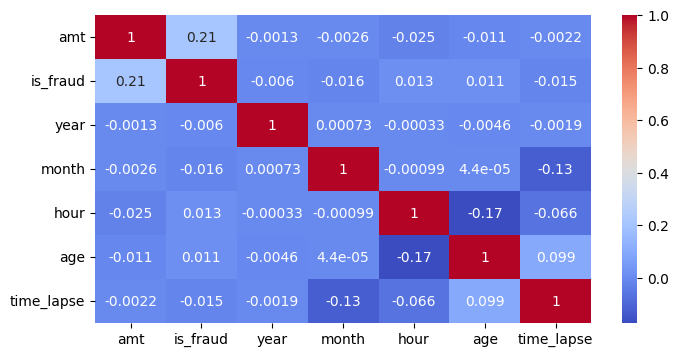

In [65]:
# Drop non-numeric columns
numeric_columns = fraud_combine.select_dtypes(include='number')
corr_matrix = numeric_columns.corr()

# Plot heatmap
fig = plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

**Inference**

*The variables are not much correlated as seen*

In [66]:
fraud_combine.columns

Index(['spend_type', 'amt', 'gender', 'state', 'is_fraud', 'ind', 'year',
       'month', 'day_of_week', 'hour', 'age', 'time_lapse'],
      dtype='object')

# Data Preprocessing
* Splitting the train and test data sets
* Create a symmetric train dataset based on the target variable
* Outlier handing
* Categorical Encoding
* Variable Transformation
* Feature Scalling.

**Split the Train - Test Dataset**

- Since our original datasets were already split, `we will not use the scikit learn train_test split class` instead we will use the `ind` column for spliting the dataset into train and test

In [67]:
train_data = fraud_combine[fraud_combine['ind'] == 'Train'] # train in ind label

test_data = fraud_combine[fraud_combine['ind'] == 'Test'] # test in ind label

In [68]:
# dropping the 'ind' column

train_data.drop(columns=['ind'], axis =1, inplace = True)

test_data.drop(columns=['ind'], axis =1, inplace = True)

In [69]:
X_train = train_data.drop('is_fraud', axis = 1) # features for training
y_train = train_data['is_fraud'] # label for training

X_test = test_data.drop('is_fraud', axis = 1) # features for testing
y_test = test_data['is_fraud'] # lables for testing

**Create a Symmetric train Dataset For Preprocessing**

**Note :** Since the data is highly imbalanced, all the operations like encoding, transformations, scaling and outlier handling can get hugly biased by the train dataset

**Strategy :**

* Let us resample the training data into a symmetric train dataset using the sklearn resample class (with 50 : 50 class distribution)
* Learn the parameters from the bench mark values from the symmetric dataset (train- symmetric)
* Apply the transformations to the real train and test datasets

**Why Skleran Resample at This stage?**

* since the dataset have lot of non-numerical variable, another oversampling methods will not work out at this stage
* Generating a bootstrap sample of a dataset for use in statistical estimation
* We will use the SMOTE technique later during the model building stage, once all variable are converted to numbers and all the preprocessing is done

In [70]:
from sklearn.utils import resample

In [71]:
train_majority = train_data[train_data['is_fraud'] == 0] # create a subset of majority class

train_minority = train_data[train_data['is_fraud'] == 1] # create a subset of minority class

majority_count = len(train_majority) # lets count the number of records in the majority class

print("Total rows in train_majority:", majority_count) # dispaly the count

Total rows in train_majority: 1289169


**We will resample the minority class that is fraud transactions and create minority_resampled that will have rows equal to that of train_majority**

In [72]:
 # resampling the minority class using the bootstraping method and make it equavalent in count with the majority class
 minority_resampled = resample(train_minority,n_samples = majority_count)
 print("Total rows in minority_resampled:",len(minority_resampled))



Total rows in minority_resampled: 1289169


Now we have the 'train_majority' and 'minority_resampled' datasets that have equal number of fraud and no fraud transactions respectively.

**Creating a new dataset 'train_symmetric' by concatnating the 'train_majority' and 'minority_resampled' datasets.**

In [73]:
# concatinating the majority class subset and resampled minority class dataset to create a symmetric dataset
train_symmetric = pd.concat([train_majority,minority_resampled], axis = 0)

# lets confirm the train symmetric dataset possess the equal distribution of classes.
train_symmetric['is_fraud'].value_counts(normalize = True)

is_fraud
0    0.5
1    0.5
Name: proportion, dtype: float64

In [74]:
train_symmetric_X = train_symmetric.drop('is_fraud', axis = 1) # features from symmetric train dataset

train_symmetric_y = train_symmetric['is_fraud'] # label from the symmetric train dataset

# Installing Feature Engine for outlier treatment, encoding, variable transformation and feature scaling

**Note :** Feature-engine is a Python library for automated feature engineering, it aims to make the process more efficient and less time-consuming by providing a collection of transformers for common tasks such as missing data imputation, categorical variable encoding, and feature scaling. Built on top of scikit-learn, it provides a consistent and flexible API to easily customize and configure feature engineering steps to improve the performance of machine learning models.

**Outlier Handling**

* Identifying the varibles with outliers
* Handling the outliers

**Note :** Feature-engine is a Python library for automated feature engineering, it aims to make the process more efficient and less time-consuming by providing a collection of transformers for common tasks such as missing data imputation, categorical variable encoding, and feature scaling. Built on top of scikit-learn, it provides a consistent and flexible API to easily customize and configure feature engineering steps to improve the performance of machine learning models.

In [75]:
!pip install feature_engine # installing the feature_engine using pip install

clear_output() # clearing the install process logs

In [76]:
# lets select the numerical columns

num_cols = X_train.select_dtypes(include = np.number).columns

num_cols

Index(['amt', 'year', 'month', 'hour', 'age', 'time_lapse'], dtype='object')

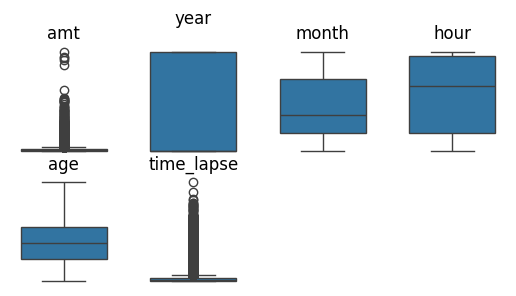

In [77]:
for ind,col_name in enumerate(num_cols):
  plot_var = train_symmetric_X[col_name]
  plt.subplot(3,4,ind+1)
  sns.boxplot(plot_var)
  plt.title(col_name)
  plt.axis(False)

**Inference**

The the following variables has outliers in it.

* amt
* time_lapse

some of the classfiers may migh be affected by the outliers. hence we need to handle them properly.

lets cap the variable at the Inter-quantile-range

* IQR = 75th Quantile - 25th Quantile
* Outliers (upper) = 75th Quantile + 1.5* IQR
* Outliesr (lower) = 25th Quantile - 1.5 * IQR

Importing the Winsorizer Class from feature engine for outlier handling

In [78]:
from feature_engine.outliers import Winsorizer

> Instentiating the capper object

In [79]:
variables = ['amt', 'time_lapse'] # variables to be handled with the outlier

capper_iqr = Winsorizer(capping_method = 'iqr',tail = 'both', fold = 1.5, variables = variables) # choosing the IQR method with fold = 1.5 time of IQR

> Fitting the capper object in the symmetric train dataset, to learn the parameters

In [80]:
capper_iqr.fit(train_symmetric_X)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['amt', 'time_lapse'])

In [81]:
print('upper capping value : ',capper_iqr.right_tail_caps_) # print the leraned parameters - upper cap

print('lower capping value : ',capper_iqr.left_tail_caps_) # pring the learned parameters - lower cap

upper capping value :  {'amt': 1167.5, 'time_lapse': 1464.0}
lower capping value :  {'amt': -668.5, 'time_lapse': -808.0}


Transforming the train_symmetric_X, X_train and X_test with the learned parameter by the capper obeject

In [82]:
train_symmetric_X = capper_iqr.transform(train_symmetric_X) # transforming symmetric X

X_train = capper_iqr.transform(X_train) # transforming the Real X with capper

X_test = capper_iqr.transform(X_test) # tranforming the test X

> Lets Look at all the distribution of the variables one more time

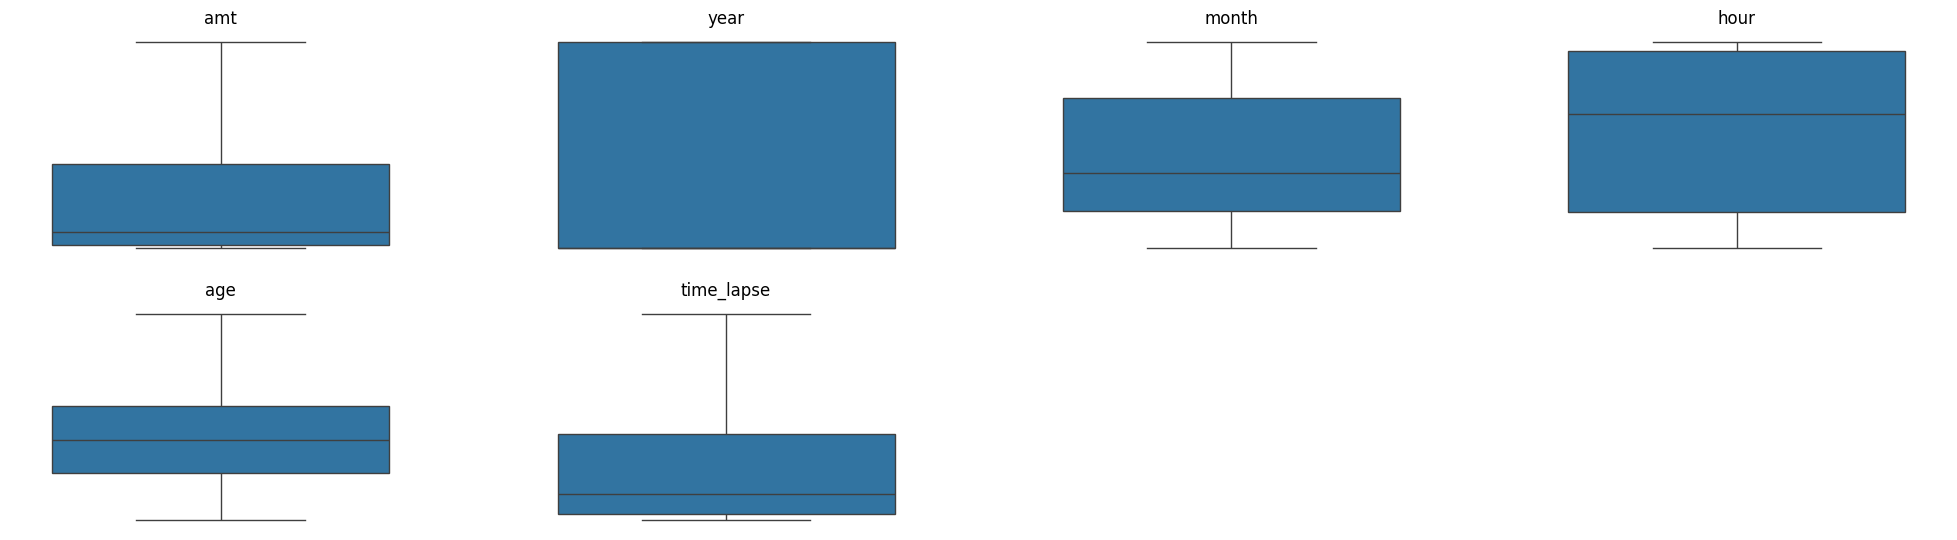

In [83]:
plt.figure(figsize = [25,10])

for ind,col_name in enumerate(num_cols):
  plot_var = train_symmetric_X[col_name]
  plt.subplot(3,4,ind+1)
  sns.boxplot(plot_var)
  plt.title(col_name)
  plt.axis(False)

Almost all variables look good in terms their distribution

**Categorical Encoding**

**Objective :** To convert non-numeric categorical variables into numerical values to be used by model building phase, allowing them to use categorical data and improve performance, it prevent the curse of dimensionality

**Steps**

* Check the cardinality of the variables
* Choose the encoding type
* Execute the encoding

# Check the Cardinality of the Categorical variables**

In [84]:
cat_cols = X_train.select_dtypes(exclude = np.number).columns # choose the categorical variables

X_train[cat_cols].nunique().sort_values(ascending = False) # look at the cardinalitries of the categorical variables

state          51
spend_type     14
day_of_week     7
gender          2
dtype: int64

Execute the Encoding - Target Guided Mean Encoding

In [85]:
#!pip uninstall imbalanced-learn scikit-learn
#!pip install imbalanced-learn scikit-learn

from feature_engine.encoding import MeanEncoder

In [86]:
variables = ['state','day_of_week','spend_type','gender']

Creating the mean encoder instance

In [87]:
mean_encod = MeanEncoder(variables = variables)

Fitting the object on the symmetric X train

In [88]:
mean_encod.fit(train_symmetric_X,train_symmetric_y)

MeanEncoder(variables=['state', 'day_of_week', 'spend_type', 'gender'])

Let's look at the encoding dict

In [89]:
mean_encod.encoder_dict_

{'state': {'AK': 0.7440432326209776,
  'AL': 0.47372089421240127,
  'AR': 0.4724701873935264,
  'AZ': 0.3706092769600657,
  'CA': 0.49974556070385945,
  'CO': 0.5834997277182792,
  'CT': 0.26308724832214764,
  'DC': 0.5053022999586834,
  'DE': 1.0,
  'FL': 0.5329285895302842,
  'GA': 0.48999350611015996,
  'HI': 0.31892180410995463,
  'IA': 0.4789891500553172,
  'ID': 0.25135281385281383,
  'IL': 0.49886380851386153,
  'IN': 0.46959211289387204,
  'KS': 0.5415679820159769,
  'KY': 0.48585744889437565,
  'LA': 0.4284071305347901,
  'MA': 0.4897806890261598,
  'MD': 0.5097998606744112,
  'ME': 0.5563197227336727,
  'MI': 0.47161647429774795,
  'MN': 0.5313759612095251,
  'MO': 0.46104372355430184,
  'MS': 0.4839096786833856,
  'MT': 0.3132579530142363,
  'NC': 0.4593774682271846,
  'ND': 0.3977839561697604,
  'NE': 0.563425909074364,
  'NH': 0.5568794479189131,
  'NJ': 0.4527513298466765,
  'NM': 0.46449073314744954,
  'NV': 0.5912966774478094,
  'NY': 0.5349596048507819,
  'OH': 0.54355

Transforming the train_symmetric_X, X_train and X_test

In [90]:
train_symmetric_X = mean_encod.transform(train_symmetric_X) # transforming the symmetric X

X_train = mean_encod.transform(X_train) # Transforming the Real X Train

X_test = mean_encod.transform(X_test) # Transforming the X test

In [91]:
X_train.dtypes

spend_type     float64
amt            float64
gender         float64
state          float64
year             int32
month            int32
day_of_week    float64
hour             int32
age              int64
time_lapse       int64
dtype: object

**Transforming the Highly Skewed Variables**

* look at the skewness of the variables
* list the variables having high skewness
* lets look at the varibale minimum value to decide which transformation can be choosen.
* Fit and tranform the datasets

Look at the skewness of the variables

In [92]:
X_train.skew()

spend_type     0.654880
amt            5.681960
gender         0.190655
state         -1.122135
year           0.943062
month          0.298516
day_of_week   -0.115896
hour          -0.282825
age            0.610304
time_lapse     1.103032
dtype: float64

list the variables having skewness more than 2.0 or lesser than -2.0

In [93]:
skew = X_train.skew()
feature_high_skew = list(skew[(skew > 2) | (skew < -2)].index)
feature_high_skew

['amt']

In [94]:
# Check the minimum and maximum values of the 'amt' column
min_value = X_train['amt'].min()
max_value = X_train['amt'].max()

print("Minimum value:", min_value)
print("Maximum value:", max_value)

Minimum value: 1.0
Maximum value: 1167.5


Note : We can try the **Yoejohnson Transformation**








Import the YeoJohnsonTransformer from feature Engine

In [95]:
from feature_engine.transformation import YeoJohnsonTransformer

Creating the transformer object

In [96]:
yeojohnson_transformer = YeoJohnsonTransformer(variables = feature_high_skew)

Fitting the symmetric X train

In [97]:
yeojohnson_transformer.fit(train_symmetric_X)

YeoJohnsonTransformer(variables=['amt'])

Transform the datasets using the transformation object

In [98]:
train_symmetric_X = yeojohnson_transformer.transform(train_symmetric_X) # transforming the symmetric X

X_train = yeojohnson_transformer.transform(X_train) # Transforming the Real X

X_test = yeojohnson_transformer.transform(X_test) # Transforming the X test

**Feature Scaling**

* Lets use the min-max scaler (normalization) since the dataset is not in the risk of the outliers and all the categories now have numerical data.

**Note :** MinMaxScaler is a feature scaling method in scikit-learn which scales the data set so that all the features lie between 0 and 1, it helps to normalize the data and it's useful for algorithm that are sensitive to the scale of the input features

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # creating the scaler object
scaler.fit(train_symmetric_X) # fit on the symmetric X to learn the parameter for the scaler

MinMaxScaler()

Lets transfor the dataframes to the minmax scaler

In [100]:
train_symmetric_X = pd.DataFrame(data = scaler.transform(train_symmetric_X), columns = train_symmetric_X.columns) # transform the X_symmetric

X_train = pd.DataFrame(data = scaler.transform(X_train), columns = X_train.columns) # transform the Real X

X_test = pd.DataFrame(data = scaler.transform(X_test), columns = X_test.columns) # transform the X test

In [101]:
# Lets look at the Train dataframe and after the transformation
print('number of arrived columns : ', len(X_train.columns))

X_train.agg(func =[np.min,np.max,np.mean, np.std], axis = 0).transpose().round(2)

number of arrived columns :  10


,min,max,mean,std
spend_type,0.0,1.0,0.37,0.35
amt,0.0,1.0,0.40,0.19
gender,0.0,1.0,0.45,0.50
state,0.0,1.0,0.33,0.07
year,0.0,1.0,0.29,0.45
month,0.0,1.0,0.47,0.31
day_of_week,0.0,1.0,0.49,0.38
hour,0.0,1.0,0.56,0.30
age,0.0,1.0,0.39,0.22
time_lapse,0.0,1.0,0.31,0.31


In [102]:
X_train.head(200)

,spend_type,amt,gender,state,year,month,day_of_week,hour,age,time_lapse
0,0.930109,0.179437,0.0,0.322323,0.0,0.000000,0.547271,0.521739,0.2375,0.983607
1,0.435918,0.458717,0.0,0.322323,0.0,0.000000,0.814332,0.347826,0.2375,0.817623
2,0.435918,0.527207,0.0,0.322323,0.0,0.000000,0.814332,0.347826,0.2375,0.001366
3,0.102804,0.396077,0.0,0.322323,0.0,0.000000,0.814332,0.521739,0.2375,0.157104
4,0.009270,0.358183,0.0,0.322323,0.0,0.000000,0.814332,0.565217,0.2375,0.021858
...,...,...,...,...,...,...,...,...,...,...
195,0.435918,0.495176,0.0,0.322323,0.0,0.181818,1.000000,0.043478,0.2375,0.639344
196,0.636080,0.050594,0.0,0.322323,0.0,0.181818,1.000000,0.739130,0.2375,0.648907
197,0.154868,0.446682,0.0,0.322323,0.0,0.181818,0.638944,0.913043,0.2375,1.000000
198,0.921207,0.519226,0.0,0.322323,0.0,0.181818,0.104780,0.043478,0.2375,0.150956


# 8.Resampling for Modeling

**Strategy :**

- Create training samples through hybrid resampling methods
- Use `imblearn - make_pipeline class` for resampling pipeline
- Majority and Minority class must be equally contributing to the resampled dataset.

> Lets check the original train set status

In [103]:
print(X_train.shape, y_train.shape,'\n')
print(y_train.value_counts(normalize = True)*100)

(1296675, 10) (1296675,) 

is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64


Context :

* Now we've got a better set of data to be trained on, in terms of data type and value consistency
* On the otherside the dataset still is huge for modeling in term of experimenting and tuning different models; hence we can reduce the size of the dataset
* The target label is still highly imbalanced ~ 99.5 % : 0.5 %
* Minority class need to have enough representation so that the model is not biased, hence the minority class need to be over sampled
* Majority class must be repeatative in the terms of a common pattern across the dataset, hence that can be under sampled

> Import SMOTE, RandomUnderSampler & make_pipeline Classes from the imblearn

In [104]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

> Create a control legth for each Class

*total length of the resulting sample = control_length x 2*

In [105]:
ini_records = sum(y_train == 0) # get to the number record representing the majority class

control_len = ini_records//3 # arriving the control length

control_len # display the control length ( expected numeber of each class in the resulting dataset )

429723

> Make pipeline for making the sample for Training

In [106]:
resample_pipeline_learning = make_pipeline(SMOTE(sampling_strategy = {1:control_len}, n_jobs = -1, random_state = 42), # oversampling of the minority class
                                  RandomUnderSampler(sampling_strategy = {0:control_len},random_state = 42), # undersampling the majority class
                                  verbose = True)

> Create the training sample using the above defined pipeline

In [107]:
X_resampled, y_resampled = resample_pipeline_learning.fit_resample(X_train,y_train)

[Pipeline] ............. (step 1 of 2) Processing smote, total=   1.0s
[Pipeline]  (step 2 of 2) Processing randomundersampler, total=   0.9s


> Lets confirm the class distribution

In [108]:
print(X_resampled.shape, y_resampled.shape,'\n')
print(y_resampled.value_counts(normalize = True)*100)

(859446, 10) (859446,) 

is_fraud
0    50.0
1    50.0
Name: proportion, dtype: float64


### Delete the Redundant Objects to Freeup the Memory

In [109]:
variable_remove = ['train_data','test_data','drop_cols2','stats_by_class','stats_by_var','normalize_count_by_class','trans_hour_distribution','majority_count','resample',
                   'train_majority','train_minority','minority_resampled','train_symmetric','train_symmetric_X','train_symmetric_y','num_cols','col_name','Winsorizer',
                   'OneHotEncoder','MeanEncoder','skew','feature_high_skew','YeoJohnsonTransformer','MinMaxScaler','SMOTE','RandomUnderSampler','make_pipeline','ini_records']

In [110]:
# deleting the redundant variables from the memory

for rem in variable_remove:
  try:
    del vars()[rem]
  except:
    pass

Training Accuracy: 0.8027415334994868
Testing Accuracy: 0.9047180319549989
Confusion Matrix:
 [[501218  52356]
 [   594   1551]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95    553574
           1       0.03      0.72      0.06      2145

    accuracy                           0.90    555719
   macro avg       0.51      0.81      0.50    555719
weighted avg       1.00      0.90      0.95    555719



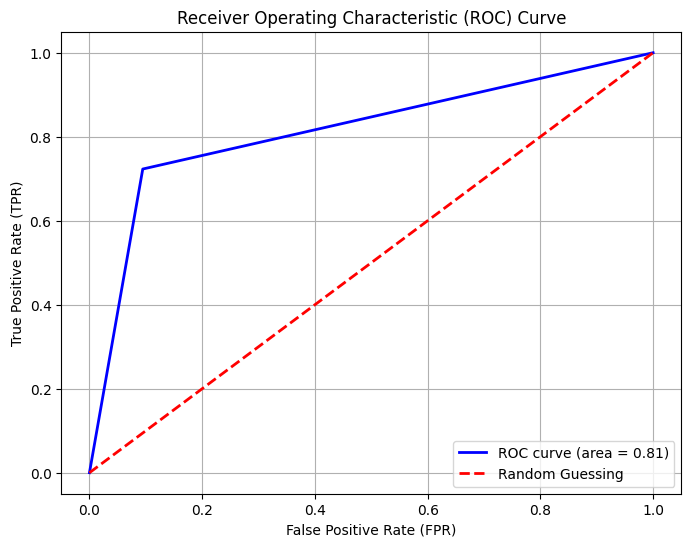

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Predict on the training set
y_train_pred = model.predict(X_resampled)

# Evaluate the model on training data
train_accuracy = accuracy_score(y_resampled, y_train_pred)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy1 = accuracy_score(y_test, y_pred)
conf_matrix1 = confusion_matrix(y_test, y_pred)
class_report1 = classification_report(y_test, y_pred)

# Print the evaluation results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", accuracy1)
print("Confusion Matrix:\n", conf_matrix1)
print("Classification Report:\n", class_report1)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC-ROC score
auc_roc1 = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_roc1)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

Training Accuracy: 0.9983151937410844
Testing Accuracy: 0.9981393474039938
Confusion Matrix:
 [[552833    741]
 [   293   1852]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.71      0.86      0.78      2145

    accuracy                           1.00    555719
   macro avg       0.86      0.93      0.89    555719
weighted avg       1.00      1.00      1.00    555719



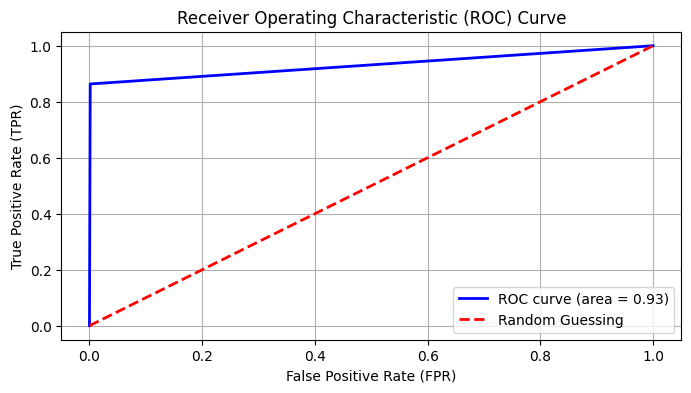

In [115]:
import xgboost as xgb

# Define the XGBoost classifier
model1 = xgb.XGBClassifier()

# Fit the model to the training data
model1.fit(X_resampled, y_resampled)

# Predict on the training set
y_train_pred1 = model1.predict(X_resampled)

# Evaluate the model on training data
train_accuracy1 = accuracy_score(y_resampled, y_train_pred1)

# Predict on the testing set
y_pred1 = model1.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred1)
class_report2 = classification_report(y_test, y_pred1)

# Print the evaluation results
print("Training Accuracy:", train_accuracy1)
print("Testing Accuracy:", accuracy2)
print("Confusion Matrix:\n", conf_matrix2)
print("Classification Report:\n", class_report2)

# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

# Calculate AUC-ROC score
auc_roc2 = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_roc2)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

Epoch 1/10
21487/21487 [==============================] - 67s 3ms/step - loss: 0.1262 - accuracy: 0.9545 - val_loss: 0.1017 - val_accuracy: 0.9637
Epoch 2/10
21487/21487 [==============================] - 66s 3ms/step - loss: 0.0864 - accuracy: 0.9686 - val_loss: 0.0833 - val_accuracy: 0.9691
Epoch 3/10
21487/21487 [==============================] - 65s 3ms/step - loss: 0.0782 - accuracy: 0.9709 - val_loss: 0.1104 - val_accuracy: 0.9579
Epoch 4/10
21487/21487 [==============================] - 62s 3ms/step - loss: 0.0725 - accuracy: 0.9729 - val_loss: 0.0873 - val_accuracy: 0.9654
Epoch 5/10
21487/21487 [==============================] - 66s 3ms/step - loss: 0.0688 - accuracy: 0.9744 - val_loss: 0.0871 - val_accuracy: 0.9677
Epoch 6/10
21487/21487 [==============================] - 64s 3ms/step - loss: 0.0658 - accuracy: 0.9754 - val_loss: 0.0950 - val_accuracy: 0.9628
Epoch 7/10
21487/21487 [==============================] - 65s 3ms/step - loss: 0.0631 - accuracy: 0.9766 - val_loss: 0

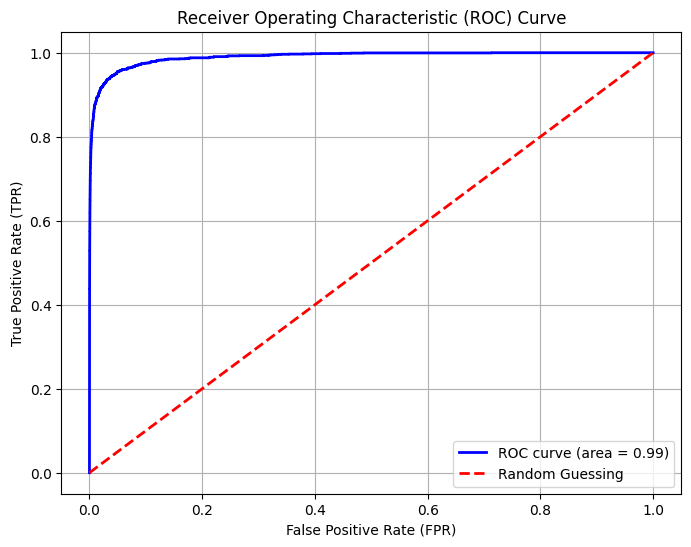

In [117]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Define the architecture of the ANN
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_resampled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model2.fit(X_resampled, y_resampled, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the training set
y_train_pred2 = model2.predict(X_resampled)
y_pred_ann1 = (y_train_pred2 > 0.5).astype(int)

# Evaluate the model on training data
train_accuracy2 = accuracy_score(y_resampled, y_pred_ann1)

# Predict on the testing set
y_pred_proba = model2.predict(X_test)
y_pred_ann = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
accuracy5 = accuracy_score(y_test, y_pred_ann)
conf_matrix5 = confusion_matrix(y_test, y_pred_ann)
class_report5 = classification_report(y_test, y_pred_ann)

# Print the evaluation results
print("Training Accuracy:", train_accuracy2)
print("Testing Accuracy:", accuracy5)
print("Confusion Matrix:\n", conf_matrix5)
print("Classification Report:\n", class_report5)

# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC-ROC score
auc_roc5 = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_roc5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [118]:
print('Logistic Regression Accuracy Score: ',accuracy1,'AUC-ROC Curve Area',auc_roc1)
print('XGBoost classifier Accuracy Score: ',accuracy2,'AUC-ROC Curve Area',auc_roc2)
print('ANN Accuracy Score: ',accuracy5,'AUC-ROC Curve Area',auc_roc5)

Logistic Regression Accuracy Score:  0.9047180319549989 AUC-ROC Curve Area 0.8142493908812415
XGBoost classifier Accuracy Score:  0.9981393474039938 AUC-ROC Curve Area 0.9310323444879982
ANN Accuracy Score:  0.9880677104795769 AUC-ROC Curve Area 0.9901063332273974


Inference :
After checking the deciding metrices for all model we see that ANN has highest AUC-ROC curve area, however that may lead to overfitting; therefore, XG Boost is the best model to go for which seems to provide a balance with an AUC-ROC of 93%.

       Feature  Importance
4         year    0.004791
2       gender    0.012163
8          age    0.017814
3        state    0.026309
5        month    0.026514
9   time_lapse    0.037684
6  day_of_week    0.038305
0   spend_type    0.120943
7         hour    0.125343
1          amt    0.590135


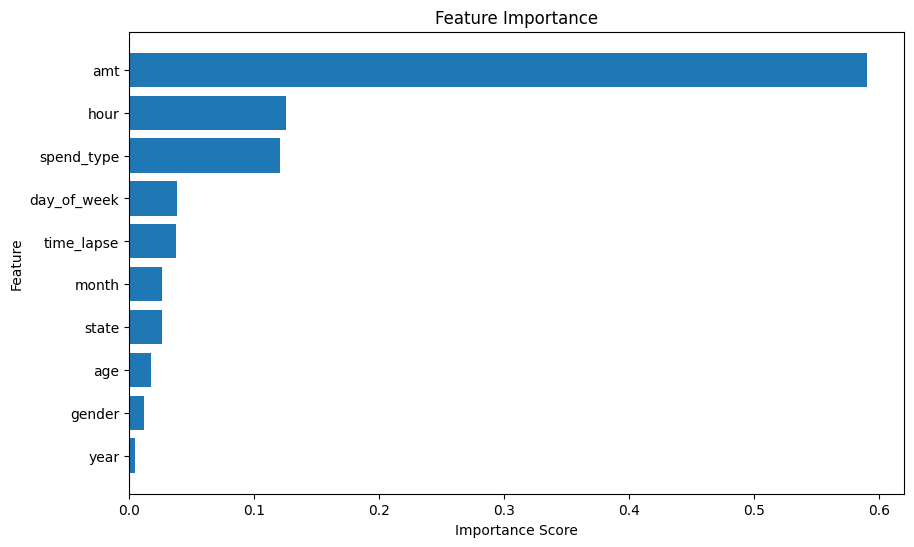

In [119]:
import xgboost as xgb

# Define the XGBoost classifier
model1 = xgb.XGBClassifier()

# Fit the model to the training data
model1.fit(X_resampled, y_resampled)

# Get feature importance
feature_importance = model1.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_resampled.columns, 'Importance': feature_importance})

# Sort the features by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance')

# Print or visualize the feature importance
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# **THANK** **YOU**